# Effect of Lasso and Ridge on Overfitting 

## 1.Project Objective
This mini-project aims to explore the effect of regularization on Linear Regression models and how it reduces overfitting. Specifically, I compare:

- OLS (Ordinary Least Squares)
- Ridge Regression (L2 penalty)
- Lasso Regression (L1 penalty)

I will analyze both train,test performance and coefficient behavior to illustrate the bias-variance tradeoff, coefficient shrinkage(Ridge), and sparsity(Lasso).

## 2.Dataset and library
I use the built-in Diabetes dataset from `sklearn.datasets`:

- 442 samples, 10 features  
- Continuous target variable  

I use basic library of Machine Learning and data processing for this project:

- `numpy`
- `pandas`
- `matplotlib`
- `sklearn`

## 3.Expected Outcomes
- Ridge coefficients shrink but remain non-zero  
- Lasso creates sparse coefficients (some exactly equal to zero)  
- Regularization reduces overfitting -> test MSE improves  
- Visualizations of coefficients and MSE vs alpha provide intuitive understanding

---

## Step 1: Import libraries & load dataset


In [5]:
# Step 1: Import libraries & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

data = load_diabetes(as_frame=True)
X = data.data           
y = data.target.values  
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
X.head()


Shape of X (features): (442, 10)
Shape of y (target): (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Step 2: Train/Test split and standardization

**Train/Test Split**  
As usual, I use the ratio of 80/20 train and test to evaluate the model on unseen data. The `random_state` is fixing at 19 so the split is always the same while running the code. 

**Standardization**   
Ridge and Lasso are sensitive to feature scales so I standardize each feature to mean=0, std=1. This ensures that regularization works properly and prevents bias from large-scale features.

**Result**   
- `X_train_scaled` and `X_test_scaled` are standardized features.
- `y_train` and `y_test` are unchanged targets.


In [6]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train X shape:", X_train_scaled.shape)
print("Test X shape:", X_test_scaled.shape)
print("Train y shape:", y_train.shape)
print("Test y shape:", y_test.shape)


Train X shape: (353, 10)
Test X shape: (89, 10)
Train y shape: (353,)
Test y shape: (89,)


## Step 3: Define models  

**Ordinary Least Squares (OLS)**
- The goal is to find $\beta$ that minimize the sum of squared error, which also minimize the lost function (MSE):
$$
L(\beta) = \|y - X\beta\|_2^2 = \sum_{i=1}^n (y_i - x_i^T \beta)^2
$$
- Closed-form solution:
$$
\hat{\beta}_{OLS} = (X^T X)^{-1} X^T y
$$
- Notes:
  - Works well when $X^T X$ is inversible.
  - Can overfit if features are correlated or number of features is large relative to samples.
  - Coefficients may be large -> high variance.

**Ridge Regression (L2 Regularization)**
- Adds an L2 penalty to control coefficient magnitude:
$$
L_{ridge}(\beta) = \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2
$$
- Closed-form solution:
$$
\hat{\beta}_{ridge} = (X^T X + \lambda I)^{-1} X^T y
$$
- Mathematical meaning:
  - $\lambda > 0$ ensures $X^T X + \lambda I$ is always inversible, because $X^T X$ positif semi-definitive so all the eigenvalue is non-negative, the addition of $\lambda I$ ensures that the solution is always inversible.
  - Shrinks all $\beta_i$ towards zero -> reduces variance and overfitting, but increase a bit bias (bias-variance tradeoff).
  - All coefficients remain non-zero -> no sparsity, every feature have a role in the model.

**Lasso Regression (L1 Regularization)**
- Loss function with L1 penalty:
$$
L_{lasso}(\beta) = \|y - X\beta\|_2^2 + \lambda \|\beta\|_1
$$
- Solution method:
  - No closed-form solution exists due to non-differentiability at $\beta_j=0$ (property of absolute value functions).
  - Solved using subgradient:
  $$
  \frac{\partial |\beta_j|}{\partial \beta_j} =
  \begin{cases}
    1 & \beta_j > 0 \\
    -1 & \beta_j < 0 \\
    [-1,1] & \beta_j = 0
  \end{cases}
  $$
- Base mathematics:
  - L1 penalty can shrink some coefficients to 0 so it selects feature.
  - Like Ridge, Lasso also controls variance, but also induces sparsity.
- Effect on bias-variance: Increasing $\lambda$ -> higher bias, lower variance, and more sparse coefficients.


**Regularization strength ($\lambda$, also call $\alpha$)**
- Controls the tradeoff between bias and variance:
  - Small $\lambda$ : closer to OLS -> low bias, higher variance -> possible overfitting.
  - Large $\lambda$ : more shrinkage/sparsity -> lower variance -> reduces overfitting but increases bias.
- I will test: $\lambda \in {0.1, 1.0, 10.0}$.



In [ ]:
# Regularization strengths (lambda)
alphas = [0.1, 1.0, 10.0]

# Build models
models = {
    "OLS": LinearRegression(),                   
    "Ridge": [Ridge(alpha=a) for a in alphas],  
    "Lasso": [Lasso(alpha=a, max_iter=10000) for a in alphas] 
}

print("Models ready:")
print("OLS:", models["OLS"])
print("Ridge models:", models["Ridge"])
print("Lasso models:", models["Lasso"])


Models ready:
OLS: LinearRegression()
Ridge models: [Ridge(alpha=0.1), Ridge(), Ridge(alpha=10.0)]
Lasso models: [Lasso(alpha=0.1, max_iter=10000), Lasso(max_iter=10000), Lasso(alpha=10.0, max_iter=10000)]


## Step 4: Fit models and collect results data

**Train Models**  
I fit OLS, Ridge, and Lasso on the training set. Ridge and Lasso are trained with multiple values of alpha (λ) -> this allows me to observe how different regularization strengths affect the model.

**Compute MSE**  
I calculate the Mean Squared Error (MSE) on both training and testing sets to me detect overfitting.  
- High train accuracy but high test error indicates overfitting.  
- Regularization should reduce overfitting -> lower test MSE.

**Store Coefficients**  
I store the coefficients β for each model to observe the effect of shrinkage (Ridge) or sparsity (Lasso).  
- Smaller alpha -> coefficients closer to OLS.  
- Larger alpha -> more shrinkage (Ridge)/more zeros (Lasso).

**Expected Observations**  
- OLS -> may overfit -> low train MSE, higher test MSE.  
- Ridge with moderate alpha -> train MSE slightly higher -> test MSE lower.  
- Lasso with moderate alpha -> some coefficients exactly 0 -> feature selection effect.


In [8]:
# Dictionaries to store results
train_mse = {}
test_mse = {}
coefficients = {}

# OLS 
ols = models["OLS"]
ols.fit(X_train_scaled, y_train)

train_mse["OLS"] = mean_squared_error(y_train, ols.predict(X_train_scaled))
test_mse["OLS"] = mean_squared_error(y_test, ols.predict(X_test_scaled))
coefficients["OLS"] = ols.coef_

# Ridge
for ridge_model in models["Ridge"]:
    alpha = ridge_model.alpha
    ridge_model.fit(X_train_scaled, y_train)
    
    train_mse[f"Ridge_{alpha}"] = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))
    test_mse[f"Ridge_{alpha}"] = mean_squared_error(y_test, ridge_model.predict(X_test_scaled))
    coefficients[f"Ridge_{alpha}"] = ridge_model.coef_

# Lasso 
for lasso_model in models["Lasso"]:
    alpha = lasso_model.alpha
    lasso_model.fit(X_train_scaled, y_train)
    
    train_mse[f"Lasso_{alpha}"] = mean_squared_error(y_train, lasso_model.predict(X_train_scaled))
    test_mse[f"Lasso_{alpha}"] = mean_squared_error(y_test, lasso_model.predict(X_test_scaled))
    coefficients[f"Lasso_{alpha}"] = lasso_model.coef_

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: {'OLS': 2822.943301876347, 'Ridge_0.1': 2822.980170666663, 'Ridge_1.0': 2825.1856634420883, 'Ridge_10.0': 2845.6887251674857, 'Lasso_0.1': 2827.434737726214, 'Lasso_1.0': 2862.5278498851185, 'Lasso_10.0': 3144.7630859002757}
Test MSE: {'OLS': 3107.5654564245833, 'Ridge_0.1': 3104.961824641944, 'Ridge_1.0': 3089.146020891061, 'Ridge_10.0': 3065.263740636445, 'Lasso_0.1': 3085.907938945586, 'Lasso_1.0': 3093.4644628999213, 'Lasso_10.0': 3500.0393882306103}


## Step 5: Visualization

I plot the train and test MSE for OLS, Ridge, and Lasso with different alpha values -> this helps me see how regularization affects overfitting.  
I also plot the coefficients β for all models -> this allows me to observe shrinkage (Ridge) or sparsity (Lasso).  
- Ridge -> coefficients are shrunk toward 0 but remain non-zero.  
- Lasso -> some coefficients are exactly 0, demonstrating feature selection.
 

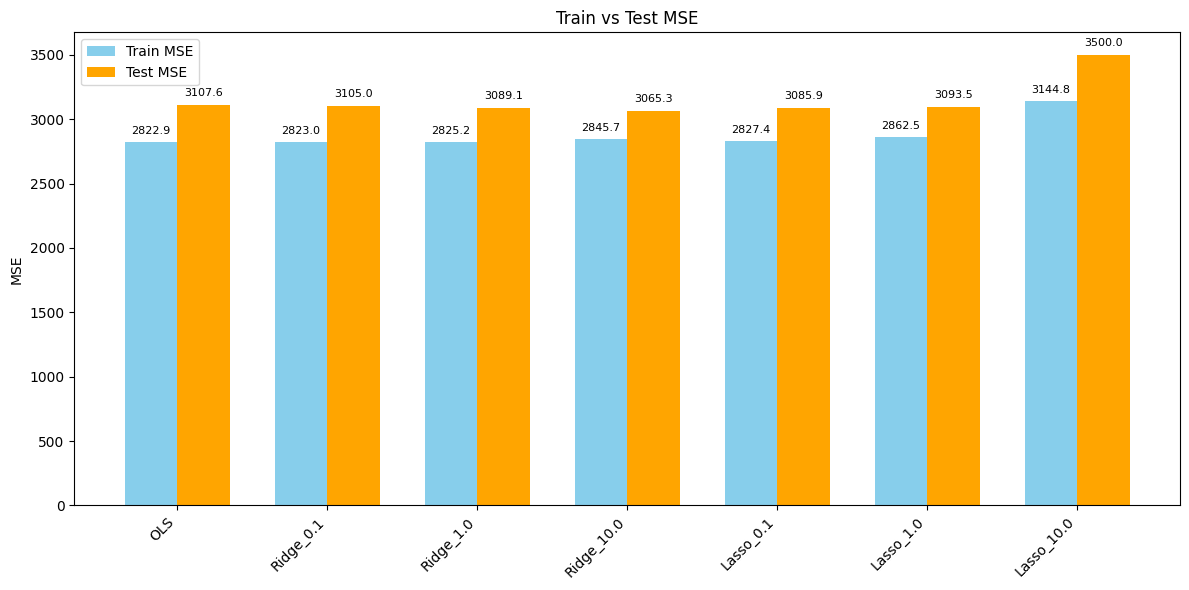

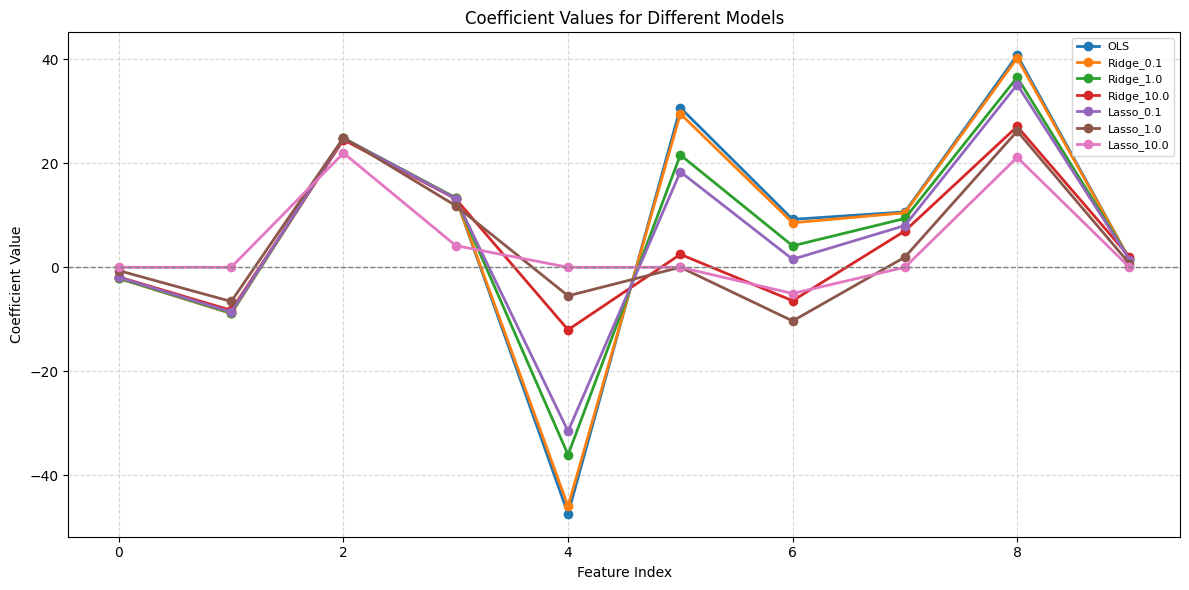

In [15]:
plt.figure(figsize=(12,6))

models_list = list(train_mse.keys())
train_vals = [train_mse[m] for m in models_list]
test_vals = [test_mse[m] for m in models_list]

x = np.arange(len(models_list))
width = 0.35

plt.bar(x - width/2, train_vals, width, label='Train MSE', color='skyblue')
plt.bar(x + width/2, test_vals, width, label='Test MSE', color='orange')

for i in range(len(models_list)):
    plt.text(x[i]-width/2, train_vals[i]+0.02*max(train_vals), f"{train_vals[i]:.1f}", ha='center', fontsize=8)
    plt.text(x[i]+width/2, test_vals[i]+0.02*max(test_vals), f"{test_vals[i]:.1f}", ha='center', fontsize=8)

plt.xticks(x, models_list, rotation=45, ha='right')
plt.ylabel("MSE")
plt.title("Train vs Test MSE")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

for model_name, coef in coefficients.items():
    plt.plot(coef, marker='o', markersize=6, linewidth=2, label=model_name)

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Different Models")
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.legend(loc='upper right', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Step 6: Conclusion & Insights

### Summary of Observations

- Train vs Test MSE: Across all models, the training MSE is consistently lower than the test MSE. This is expected because the models are directly optimized on the training data. The observed difference (~200–300) is acceptable and does not indicate severe overfitting.
- Ordinary Least Squares : OLS achieves the lowest training MSE, reflecting a very close fit to the training data. However, its test MSE is higher compared to Ridge or Lasso with moderate regularization, indicating basic overfitting: the model captures noise in the training set and generalizes less effectively.
-Ridge Regression : Applying L2 regularization shrinks coefficients toward zero. This results in a slightly higher training MSE but reduces test MSE, demonstrating improved generalization and reduced variance.
-Lasso Regression : Applying L1 regularization enforces sparsity, setting some coefficients exactly to zero. This feature selection effect produces a simpler model and can reduce test MSE, particularly when irrelevant or correlated features are present.

### Key Takeaways

* **Regularization is crucial** when models overfit or features are highly correlated.
* **Ridge regression** is suitable when all features are believed to be informative, but smaller coefficient magnitudes are desirable.
* **Lasso regression** is useful for producing sparse models and performing automatic feature selection.
* **Simultaneous observation of train/test MSE and coefficient magnitudes** aids in selecting the optimal model type and regularization strength (α).

### Comparative Analysis of Models

* **OLS:** Lowest training MSE but comparatively higher test MSE → overfitting.
* **Ridge (α = 0.1 → 10):** As α increases, training MSE rises slightly while test MSE initially decreases. Shrinking coefficients reduces variance, improving test performance.
* **Lasso (α = 0.1 → 10):** With small α, performance is similar to Ridge. With large α (e.g., α = 10), many coefficients are forced to zero, leading to increased bias and loss of important information → test MSE rises.

### Trends in MSE with Respect to α

* Increasing α generally causes training MSE to increase and test MSE to decrease initially, followed by an increase if α becomes too large.
* This behavior reflects the **bias-variance tradeoff**: stronger regularization increases bias but reduces variance.

### Mathematical and Dataset Considerations

* **Ridge (L2 penalty):** Coefficients are shrunk toward zero, which reduces variance and stabilizes test performance relative to OLS.
* **Lasso (L1 penalty):** Coefficients are both shrunk and sparsified. Excessive regularization can zero out too many features, increasing bias and test MSE.
* **Dataset characteristics:** The diabetes dataset contains multiple features with correlations. OLS easily overfits correlated features, while regularization stabilizes coefficient estimates. Excessively large α values result in underfitting, reflected by rising test MSE.

### 💡 Summary of Key Insights

* OLS fits training data well but is prone to overfitting → higher test MSE.
* Ridge and Lasso with moderate α reduce test MSE → effective regularization.
* Excessive Lasso regularization → many coefficients set to zero → loss of information → test MSE increases (high bias).
* The observed trends clearly illustrate the **bias-variance tradeoff**, a fundamental concept in machine learning model selection and evaluation.
